In [1]:
%matplotlib inline
import scipy
import numpy as np
import matplotlib.pyplot as plt
import ODE_solver as ODE
import astropy.units as u
import astropy.constants as const

# Problem 2 - Solving the Damped Pendulum

Define the ODEs that will solve the equations of the damped pendulum. The following cells are taken directly from the odeint documentation found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [2]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

In [3]:
b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
t = np.arange(0, 10, 0.01)

In [4]:
from scipy.integrate import odeint
sol = odeint(pend, y0, t, args=(b,c))

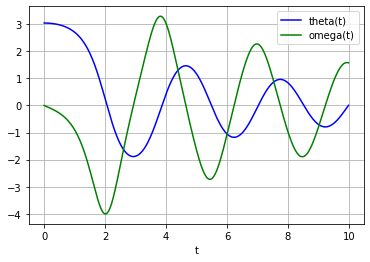

In [5]:
plt.plot(t, sol[:,0], 'b', label='theta(t)')
plt.plot(t, sol[:,1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

Now we will solve the same set of equations using my 3 ODE solvers and compare the results. 

In [6]:
## We have to define the function we want to solve, pend_ODE, as the output of another function that
## will pass the paramaters, b and c. This is due to the fact that my ODE solvers expect a function that takes input
## in the form (x, y) - in order to consider b and c, I would have to hardcode these inputs into my ODE solvers.
## But, we want the ODE solvers to be as general as possible. So hardcoding would be bad practice.
## Therefore, I can get around that by defining a function that sends the additional paramaters to the function
## we are solving for.
def pend_params(b, c):
    def pend_ODE(x, y):
        dydt = [y[1], -b*y[1] - c*np.sin(y[0])]
        return dydt
    return pend_ODE

## Define the points we want to the values of theta and omega at.
x = np.arange(0, 10, 0.01)

In [7]:
## Solve the equations using my 3 ODE solvers.
y_euler = ODE.euler_method(pend_params(0.25, 5.0), y0, x, 0.01)
y_heuns = ODE.heuns_method(pend_params(0.25, 5.0), y0, x, 0.01)
y_rk4 = ODE.rk4_method(pend_params(0.25, 5.0), y0, x, 0.01)

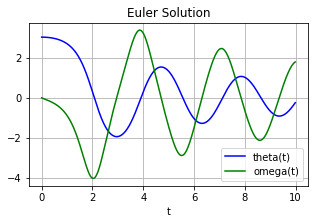

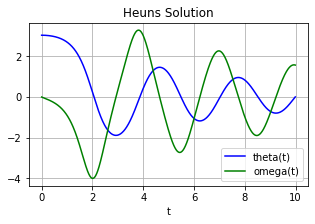

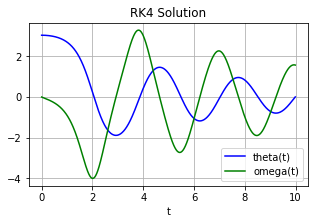

In [8]:
## Plot all of the results.


plt.figure(figsize=(5,3))
plt.title('Euler Solution')
plt.plot(x, y_euler[:,0], 'b', label='theta(t)')
plt.plot(x, y_euler[:,1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

plt.figure(figsize=(5,3))
plt.title('Heuns Solution')
plt.plot(x, y_heuns[:,0], 'b', label='theta(t)')
plt.plot(x, y_heuns[:,1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

plt.figure(figsize=(5,3))
plt.title('RK4 Solution')
plt.plot(x, y_rk4[:,0], 'b', label='theta(t)')
plt.plot(x, y_rk4[:,1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

We can also plot the absolute error between the two results to see how close to scipy.odeint our RK4 method gets. They differ by no more than $ \approx 5 \times 10^{-7} $.

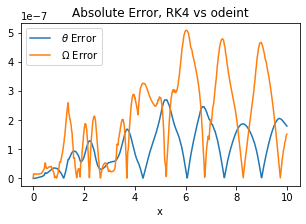

In [9]:
## Define absolute error as:
def abs_error(a, b):
    return np.abs(a - b)

## Calculate the absolute error.
error_theta = abs_error(y_rk4[:,0], sol[:,0])
error_omega = abs_error(y_rk4[:,1], sol[:,1])

## Plot the error
plt.figure(figsize=(5,3))
plt.title('Absolute Error, RK4 vs odeint')
plt.plot(x, error_theta, label = r" $\theta$ Error")
plt.plot(x, error_omega, label = r" $\Omega$ Error")
plt.xlabel('x')
plt.legend()
plt.show()

# Problem 3 - Stiff ODE Test

We will now solve this equation numerically:

$\frac{dy(t)}{dt} = -\lambda (y(t) - \cos(t))$ with $y(0) = 0$.

And compare it to the analytical solution of the form:

$y(t) = -\frac{\lambda^2}{1 + \lambda^2} e^{-\lambda t} + \frac{\lambda}{1 + \lambda^2} \sin(t) + \frac{\lambda^2}{1 + \lambda^2} \cos(t)$

In [24]:
x = np.arange(0, 15, 0.0001)
y0 = 0.0
lam = 15

## Define the stiff ODE given in above.
def stiff_ODE_params(lam):
    def stiff_ODE(x, y):
        dydt = -lam * (y - np.cos(x))
        return dydt
    return stiff_ODE

## Define the exact solution.
def stiff_ODE_exact(lam, x):
    return lam/(1 + lam**2.0) * np.sin(x) + lam**2/(1 + lam**2) * np.cos(x) - lam**2/(1 + lam**2) * np.exp(-lam * x)

## Solve the equations using my 3 ODE solvers.
y_stiff_euler = ODE.euler_method(stiff_ODE_params(lam), y0, x, 0.0001)
y_stiff_heuns = ODE.heuns_method(stiff_ODE_params(lam), y0, x, 0.0001)
y_stiff_rk4 = ODE.rk4_method(stiff_ODE_params(lam), y0, x, 0.0001)
y_stiff_exact = stiff_ODE_exact(lam, x)

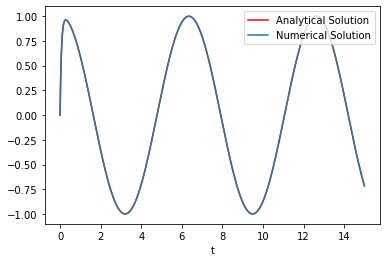

In [27]:
## Plot the solutions
plt.plot(x, y_stiff_exact, 'r', label='Analytical Solution')
plt.plot(x, y_stiff_euler, label='Numerical Solution, Euler')
plt.xlabel('t')
plt.legend(loc = 'upper right')
plt.show()

plt.plot(x, y_stiff_exact, 'r', label='Analytical Solution')
plt.plot(x, y_stiff_heuns, label='Numerical Solution, Heuns')
plt.xlabel('t')
plt.legend(loc = 'upper right')
plt.show()

plt.plot(x, y_stiff_exact, 'r', label='Analytical Solution')
plt.plot(x, y_stiff_rk4, label='Numerical Solution, RK4')
plt.xlabel('t')
plt.legend(loc = 'upper right')
plt.show()


# Problem 4 - White Dwarf Mass vs Radius

In [44]:
## Define the pressure calculation found in Assignment 3, Eq. 4.
def pressure_calc(dens):
    dens = dens * u.g / u.cm**3
    h = const.h
    amu = const.u
    m_e = const.m_e
    
    return ((1/20 * (3/np.pi)**(2/3) * h**2 / (m_e * amu**(5/3)) * (dens/2)**(5/3)).to(u.Ba)).value
    
## Define the density calculation, found by solving for P in Assignment 3, Eq. 4.
def density_calc(pres):
    h = const.h
    amu = const.u
    m_e = const.m_e
    
    pres = pres * u.Ba
    
    c1 = 20 / (3/np.pi)**(2/3)
    c2 = (m_e * amu**(5/3))/h**2 * 2**(5/3)
    
    return (((pres * c1 * c2)**(3/5)).to(u.g / u.cm**3)).value


## Define Hydrostatic Equilibrium for a White Dwarf
def calc_WD(x, y):
    pi = np.pi
    G = const.G.cgs
    
    pressure = y[0] 
    M_enc = y[1]
        
    ## Update the density.
    density = density_calc(pressure)
    
    ## Avoid hitting any numerical snags by requiring this.
    ## Without it, the solution will diverge to infinite Pressure. 
    ## It isn't necessarily a truly physical requirement but it seems
    ## to be required for the algorithm to survive.
    if M_enc == 0:
        dP_dr = 0
    
    ## Calculate dP_dr and dm_dr as found in Assignment 3, Eqs 1 and 2.
    else:
        dP_dr = -G.value * M_enc * density/x**2
        
    dm_dr = 4 * pi * x**2 * density
    
    ## Once we reach a negative pressure, we've made it to the edge. Pressure
    ## and enclosed mass are constant.
    if pressure < 0:
        dP_dr = 0
        dm_dr = 0
    
    return [dP_dr, dm_dr]
    
r = np.arange(0, 3e9, 5e6)

dens_0 = 1e7

y0 = [pressure_calc(dens_0), 0]

## Solve the equations for a WD
## Notice that you will get RuntimeWarnings when you execute this. These errors
## come from the region where pressure < 0.
## I could build in a stop command once pressure < 0 to stop there. But
## I find it easier to simply remove those values in post-processing. 
y_WD_rk4 = ODE.rk4_method(calc_WD, y0, r, 5e6)

/Users/brendandrachler/opt/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Text(0.5, 1.0, 'R $(R_\\odot)$ vs M $(M_\\odot)$ for WD')

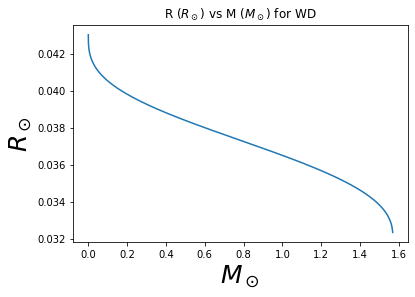

In [45]:
## Plot the solutions.
r_new = ((r * u.cm).to(u.R_sun)).value
M_new = ((y_WD_rk4[:,1] * u.g).to(u.M_sun)).value
plt.plot(M_new[:150], np.flip(r_new)[:150])
plt.xlabel(r"$M_\odot$", size = 25)
plt.ylabel(r"$R_\odot$", size = 25)
plt.title(r"R $(R_\odot)$ vs M $(M_\odot)$ for WD")

# Problem 5 - Neutron Star Mass vs Radius

In [21]:
## Define the pressure calculation found in Assignment 3, Eq. 5.
def pressure_calc_NS(dens):
    dens = dens * u.g / u.cm**3
    h = const.h
    amu = const.u
    m_n = const.m_n
    
    return ((1/20 * (3/np.pi)**(2/3) * h**2 / m_n**(8/3) * (dens)**(5/3)).to(u.Ba)).value
    
## Define the density calculation, found by solving for P in Assignment 3, Eq. 5.
def density_calc_NS(pres):
    h = const.h
    amu = const.u
    m_n = const.m_n
    
    pres = pres * u.Ba
    
    c1 = 20 / (3/np.pi)**(2/3)
    c2 = (m_n**(8/3))/h**2
    
    return (((pres * c1 * c2)**(3/5)).to(u.g / u.cm**3)).value

## Define Hydrostatic Equilibrium equations for a Neutron Star
def calc_NS(x, y):
    pi = np.pi
    G = const.G.cgs
    
    pressure = y[0] 
    M_enc = y[1]
        
    ## Update the density.
    density = density_calc_NS(pressure)
    
    ## Avoid hitting any numerical snags by requiring this.
    ## Without it, the solution will diverge to infinite Pressure. 
    ## It isn't necessarily a truly physical requirement but it seems
    ## to be required for the algorithm to survive.
    if M_enc == 0:
        dP_dr = 0
    
    ## Calculate dP_dr and dm_dr as found in Assignment 3, Eqs 1 and 2.
    else:
        dP_dr = -G.value * M_enc * density/x**2
        
    dm_dr = 4 * pi * x**2 * density
    
    ## Once we reach a negative pressure, we've made it to the edge. Pressure
    ## and enclosed mass are constant.
    if pressure < 0:
        dP_dr = 0
        dm_dr = 0
    
    return [dP_dr, dm_dr]
    
r = np.arange(0, 2e6, 5e2)

dens_0 = 1e17

y0 = [pressure_calc_NS(dens_0), 0]

## Solve the equations for a NS
## Notice that you will sometimes get RuntimeWarnings when you execute this. These errors
## come from the region where pressure < 0.
## I could build in a stop command once pressure < 0 to stop there. But
## I find it easier to simply remove those values in post-processing. 
y_NS_rk4 = ODE.rk4_method(calc_WD, y0, r, 5e2)

(6, 20)

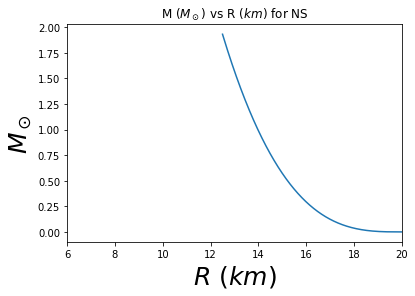

In [27]:
r_new = ((r * u.cm).to(u.km)).value
M_new = ((y_NS_rk4[:,1] * u.g).to(u.M_sun)).value
plt.plot(np.flip(r_new)[:1500], M_new[:1500])
plt.ylabel(r"$M_\odot$", size = 25)
plt.xlabel(r"$R \ (km)$", size = 25)
plt.title(r"M $(M_\odot)$ vs R $(km)$ for NS")
plt.xlim(6, 20)